# Step 1 : **Camera calibration**

**Compute the camera calibration matrix and distortion coefficients given a set of chessboard images.**

In [1]:
import numpy as np
import pandas as pd
import cv2
import glob
import matplotlib.pyplot as plt
%matplotlib inline

In [2]:
!unzip camera_cal.zip

Archive:  camera_cal.zip
  inflating: camera_cal/calibration1.jpg  
  inflating: camera_cal/calibration10.jpg  
  inflating: camera_cal/calibration11.jpg  
  inflating: camera_cal/calibration12.jpg  
  inflating: camera_cal/calibration13.jpg  
  inflating: camera_cal/calibration14.jpg  
  inflating: camera_cal/calibration15.jpg  
  inflating: camera_cal/calibration16.jpg  
  inflating: camera_cal/calibration17.jpg  
  inflating: camera_cal/calibration18.jpg  
  inflating: camera_cal/calibration19.jpg  
  inflating: camera_cal/calibration2.jpg  
  inflating: camera_cal/calibration20.jpg  
  inflating: camera_cal/calibration3.jpg  
  inflating: camera_cal/calibration4.jpg  
  inflating: camera_cal/calibration5.jpg  
  inflating: camera_cal/calibration6.jpg  
  inflating: camera_cal/calibration7.jpg  
  inflating: camera_cal/calibration8.jpg  
  inflating: camera_cal/calibration9.jpg  


In [3]:
# Load calibration images.
images_calibration = list(map(lambda imageFileName: (imageFileName, cv2.imread(imageFileName)),
                              glob.glob('camera_cal/calibration*.jpg')))

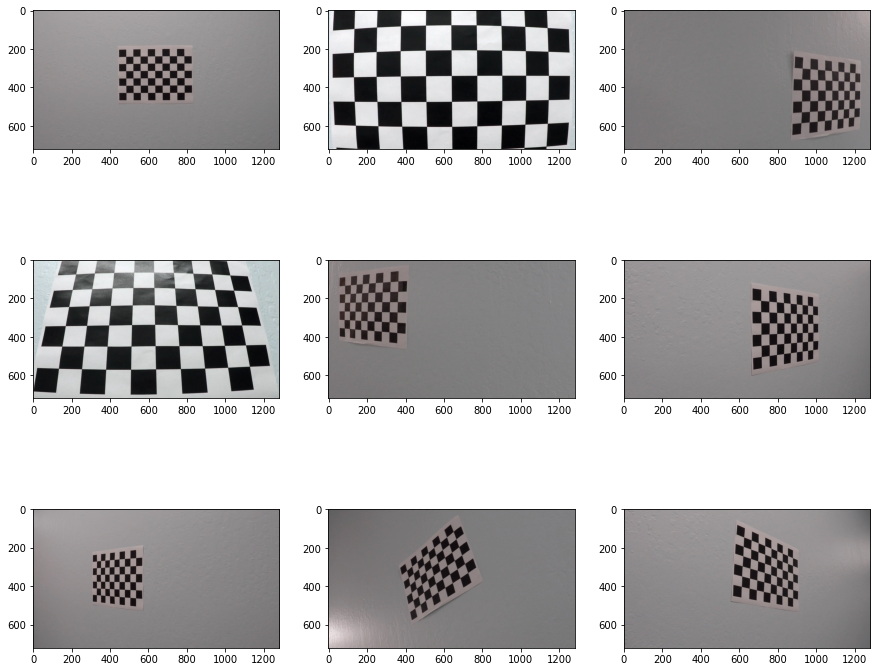

In [ ]:
def showImages(images, cols = 4, rows = 5, figsize=(15,10)):
    """
    Display `images` on a [`cols`, `rows`] subplot grid.
    """
    imgLength = len(images)
    fig, axes = plt.subplots(rows, cols, figsize=figsize)
    indexes = range(cols * rows)
    for ax, index in zip(axes.flat, indexes):
        if index < imgLength:
            imagePathName, image = images[index]
            ax.imshow(image)
            # ax.set_title(imagePathName)
    
        
showImages(images_calibration, 3, 3, (15, 13))
# plt.savefig("images_calibration_Exemples.png")

**Extract Object Points & Image Points**

I converted images to grayscale using cv2.COLOR_BGR2GRAY because I readed  imges using cv2.imread() this will read in an BGR image


In [4]:
print("store object points and image points from all the images....")

# prepare object points, like (0,0,0), (1,0,0), (2,0,0) ....,(6,5,0)
objp = np.zeros((6*9,3), np.float32)
objp[:,:2] = np.mgrid[0:9,0:6].T.reshape(-1,2)  # x and y cordinates.

# Arrays to store object points and image points from all the images.
objpoints = [] # 3d points in real world space
imgpoints = [] # 2d points in image plane.

# Arrays to store pointed images and original images 
outimages = []
originalImages = []

# Step through the list and search for chessboard corners
for fname in images_calibration:
    fileName, img = fname
    # grayscale images :
    gray = cv2.cvtColor(img,cv2.COLOR_BGR2GRAY)

    # Finding chessboard corners (for an 9x6 board):
    ret, corners = cv2.findChessboardCorners(gray, (9,6),None)

    # If found, add object points, image points & draw corners
    if ret == True:
        objpoints.append(objp)
        imgpoints.append(corners)
        
        # Draw and display the corners
        pointed_img = cv2.drawChessboardCorners(img.copy(), (9,6), corners, ret)
        outimages.append(pointed_img)
        originalImages.append(img)

print("Done !")

store object points and image points from all the images....
Done !


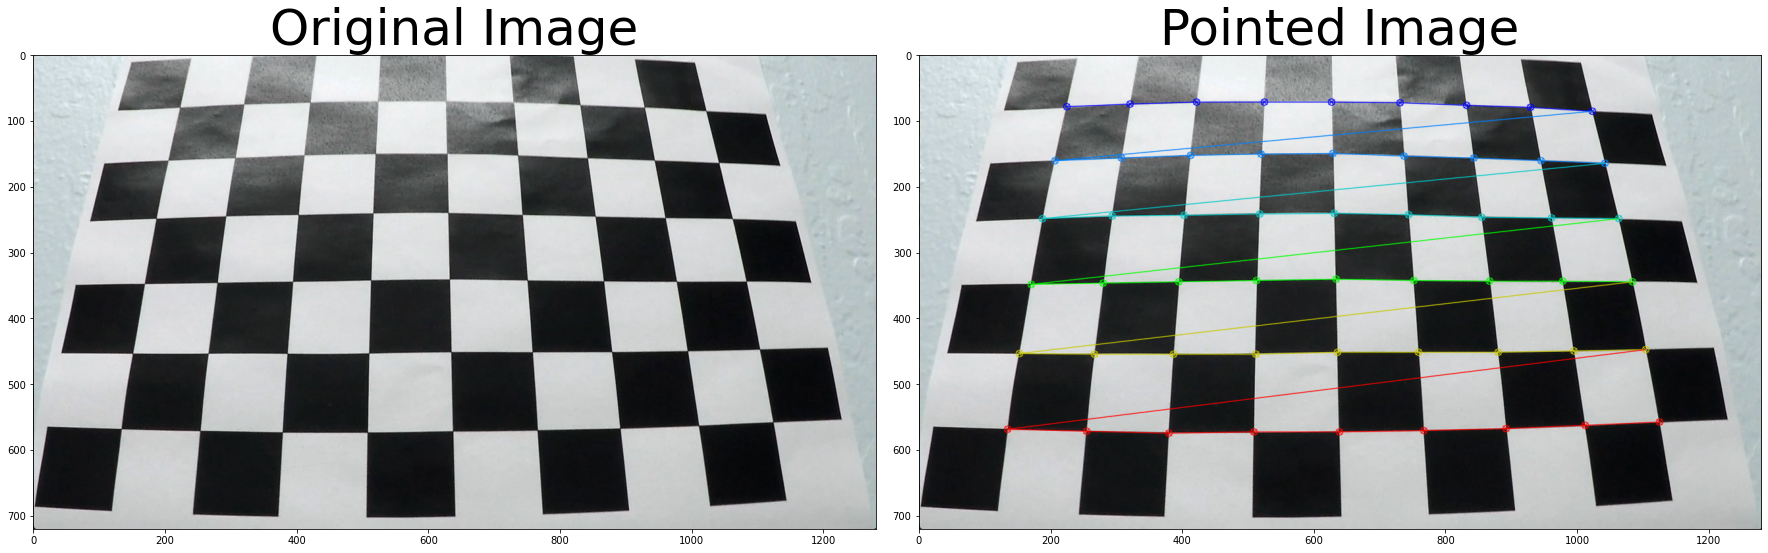

In [31]:
# choose an image to show
index = 7
original = originalImages[index]
chessPoints = outimages[index]

f, (ax1, ax2) = plt.subplots(1, 2, figsize=(24, 9))
f.tight_layout()
ax1.imshow(original)
ax1.set_title('Original Image', fontsize=50)
ax2.imshow(chessPoints)
ax2.set_title('Pointed Image', fontsize=50)
plt.subplots_adjust(left=0., right=1, top=0.9, bottom=0.)
plt.savefig("Pointed_Image.png")

# **Distortion Correction**

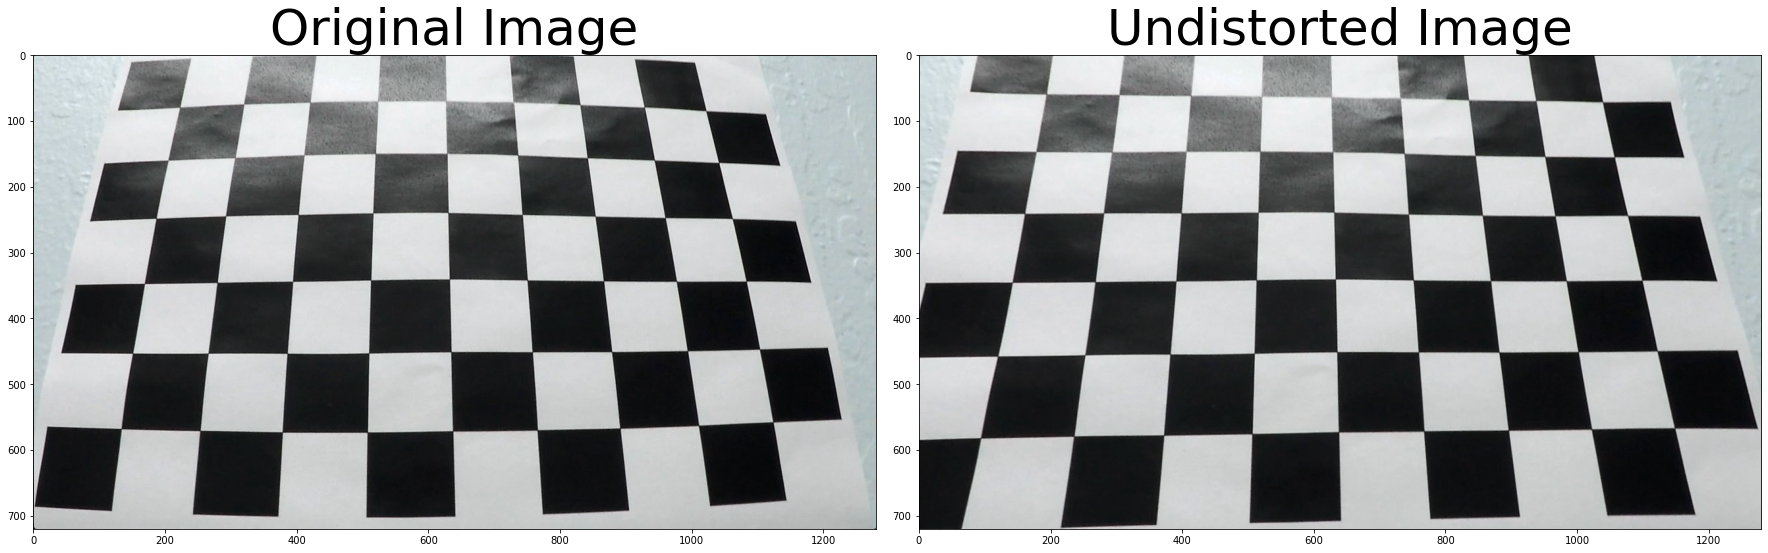

In [26]:
def cal_undistort(img, objpoints, imgpoints) :

  # Camera calibration, given object points, image points, and the shape of the grayscale image:
  ret, mtx, dist, rvecs, tvecs = cv2.calibrateCamera(objpoints, imgpoints, gray.shape[::-1], None, None)

  #Undistorting a test image:
  undist = cv2.undistort(img, mtx, dist, None, mtx)

  return undist

undistorted = cal_undistort(original, objpoints, imgpoints)

f, (ax1, ax2) = plt.subplots(1, 2, figsize=(24, 9))
f.tight_layout()
ax1.imshow(original)
ax1.set_title('Original Image', fontsize=50)
ax2.imshow(undistorted)
ax2.set_title('Undistorted Image', fontsize=50)
plt.subplots_adjust(left=0., right=1, top=0.9, bottom=0.)
plt.savefig("undistorted.png")